### File for creating "preceding  metrics" plots for predictions using the RF model I trained ...

3/6/2025

In [1]:
#relevant import statements
import numpy as np
import math
import pandas as pd
import xarray as xr 
import pickle 
import matplotlib.pyplot as plt

Open and pre-process ellipse metrics. 

In [2]:
##open ellipse metric files
infile = open("./data/ellipse/era5_wind50_59.p", 'rb') 
wind10 = pickle.load(infile)
infile.close()

infile = open("./data/ellipse/era5_size50_59.p", 'rb') 
size10 = pickle.load(infile)
infile.close()

infile = open("./data/ellipse/era5_ratio50_59.p", 'rb') 
rat10 = pickle.load(infile)
infile.close()

infile = open("./data/ellipse/era5_ephi50_59.p", 'rb') 
ephi10 = pickle.load(infile)
infile.close()

infile = open("./data/ellipse/era5_cenlat50_59.p", 'rb')
cenlat10 = pickle.load(infile)
infile.close()

infile = open("./data/ellipse/era5_cenlon50_59.p", 'rb')
cenlon10 = pickle.load(infile)
infile.close()

infile = open("./data/gph/NA_gph_weightedANOM_500.p", 'rb') 
gph = pickle.load(infile)
infile.close()

infile = open("./data/pv/CAP_pvu_weightedANOM_100.p", 'rb') 
pv = pickle.load(infile)
infile.close()

In [3]:
#remove leap year
wind10 = np.delete(wind10,[120],1)
rat10 = np.delete(rat10,[120],1)
cenlat10 = np.delete(cenlat10,[120],1)
cenlon10 = np.delete(cenlon10,[120],1)
size10 = np.delete(size10,[120],1)
ephi10 = np.delete(ephi10,[120],1)

In [4]:
#remove NaNs
indices = np.isnan(wind10)
for i in range(0,63):
    for j in range(0,151):
        if indices[i,j] != False:
            print(i)
            print(j)
            print("True")
            wind10[i,j] = 0
            rat10[i,j] = 0
            cenlat10[i,j] = 0
            cenlon10[i,j] = 0
            size10[i,j] = 0
            ephi10[i,j] = 0

24
144
True
24
145
True
24
146
True
24
147
True
24
148
True
24
149
True
24
150
True
29
145
True
29
146
True
29
147
True
29
148
True
29
149
True
39
149
True
39
150
True
41
144
True


In [5]:
input = np.empty((63,151,8))

In [6]:
input[:,:,0] = wind10[:,:]
input[:,:,1] = rat10[:,:]
input[:,:,2] = cenlat10[:,:]
input[:,:,3] = cenlon10[:,:]
input[:,:,4] = size10[:,:]
input[:,:,5] = ephi10[:,:]
input[:,:,6] = gph[:,:]
input[:,:,7] = pv[:,:]

Now that the assembly is done ... We can plot. lol.

In [7]:
##open indice files
infile = open("./RF_indices/range_indices_RF3.p", 'rb') ##essentially just taking the ranges from the testing data (which is being plotted?)  
ranges = pickle.load(infile)
infile.close()

infile = open("./RF_indices/posXtest_RF3.p", 'rb') 
posXtest = pickle.load(infile)
infile.close()

infile = open("./RF_indices/FposXtest_RF3.p", 'rb') 
FposXtest = pickle.load(infile)
infile.close()

infile = open("./RF_indices/negXtest_RF3.p", 'rb') 
negXtest = pickle.load(infile)
infile.close()

infile = open("./RF_indices/FnegXtest_RF3.p", 'rb') 
FnegXtest = pickle.load(infile)
infile.close()

In [8]:
##reduce input to just the testing data
nolag_Xtest = input[58:,:,:]
nolag_Xtest.shape

(5, 151, 8)

### The following few cells are if you would like to make a timeseries plot. 

### These few cells will be for making box plots instead lol. 

In [9]:
##Correct Positive Events
pos_corr_events = []
pos_corr_num = []
pos_corr_total_events = []

for i in range(0,5):
    for j in range(0,141):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(posXtest)):
            pos_index = posXtest[k]
            if pos_index == date_index:
                pos_corr_total_events.append(0)
                if j<=9:
                    continue
                else:
                    pos_corr_num.append(0)
                    pos_corr_events.extend(nolag_Xtest[i,j-10:j,:])

##reshape
pos = np.array(pos_corr_events).reshape((len(pos_corr_num),10,8))
print(pos.shape)
print(len(pos_corr_total_events))
##A LOT OF THE CORRECT POSITIVE EVENTS ARE WITHIN 20 DAYS OF THE START OF THE YEAR

(3487, 10, 8)
5156


In [10]:
##FALSE Positive Events
Fpos_corr_events = []
Fpos_corr_num = []
Fpos_corr_total_events = []

for i in range(0,5):
    for j in range(0,141):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(FposXtest)):
            pos_index = FposXtest[k]
            if pos_index == date_index:
                Fpos_corr_total_events.append(0)
                if j<=9:
                    continue
                else:
                    Fpos_corr_num.append(0)
                    Fpos_corr_events.extend(nolag_Xtest[i,j-10:j,:])
##reshape
Fpos = np.array(Fpos_corr_events).reshape((len(Fpos_corr_num),10,8))
print(Fpos.shape)
print(len(Fpos_corr_total_events))

(1236, 10, 8)
1236


In [11]:
##Correct Negative Events
neg_corr_events = []
neg_corr_num = []
neg_corr_total_events = []

for i in range(0,5):
    for j in range(0,141):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(negXtest)):
            neg_index = negXtest[k]
            if neg_index == date_index:
                neg_corr_total_events.append(0)
                if j<=9:
                    continue
                else:
                    neg_corr_num.append(0)
                    neg_corr_events.extend(nolag_Xtest[i,j-10:j,:])
##reshape
neg = np.array(neg_corr_events).reshape((len(neg_corr_num),10,8))
print(neg.shape)
print(len(neg_corr_total_events))

(5851, 10, 8)
5851


In [12]:
##FALSE Negative Events
Fneg_corr_events = []
Fneg_corr_num = []
Fneg_corr_total_events = []

for i in range(0,5):
    for j in range(0,141):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        for k in range(len(FnegXtest)):
            neg_index = FnegXtest[k]
            if neg_index == date_index:
                Fneg_corr_total_events.append(0)
                if j<=9:
                    continue
                else:
                    Fneg_corr_num.append(0)
                    Fneg_corr_events.extend(nolag_Xtest[i,j-10:j,:])

##reshape
Fneg = np.array(Fneg_corr_events).reshape((len(Fneg_corr_num),10,8))
print(Fneg.shape)
print(len(Fneg_corr_total_events))

(1939, 10, 8)
1939


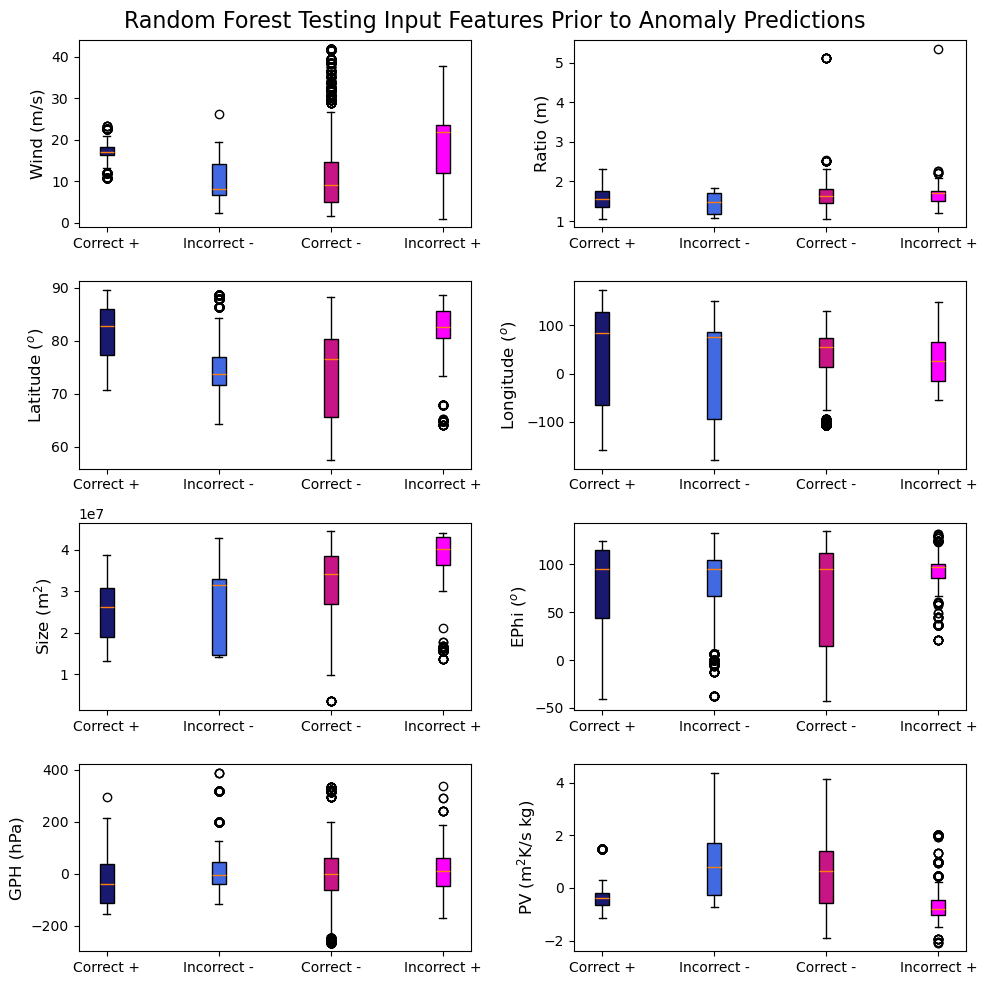

In [14]:
import matplotlib.ticker as mticker
myLocator = mticker.MultipleLocator(2)

metrics = ["Wind (m/s)", "Ratio (m)", "Latitude ($^o$)", "Longitude ($^o$)", "Size (m$^2$)", "EPhi ($^o$)", "GPH (hPa)", "PV (m$^2$K/s kg)"]
ticks = ['Correct +', 'Incorrect -', 'Correct -', 'Incorrect +'] #set tick numbers for dataset
ind = [2, 4, 6, 8]  # the x locations for the groups
w = 0.25 #box-plot width
c = ["midnightblue","royalblue","mediumvioletred","magenta"]
fs = 12

fig, axes = plt.subplots(4, 2, figsize=(10, 10))
plt.suptitle("Random Forest Testing Input Features Prior to Anomaly Predictions", fontsize = 16)
axes = axes.flatten()
for i in range(0,8):

    if i ==6:
        C_pos = pos[:,0,i]
        F_neg = Fneg[:,0,i]
        C_neg = neg[:,0,i]
        F_pos = Fpos[:,0,i]
        
        a1 =axes[i].boxplot([C_pos,F_neg,C_neg,F_pos], positions= [2,4,6,8], widths=w, patch_artist=True)
        for bplot in (a1,):
            for patch, color in zip(bplot['boxes'], c):
                patch.set_facecolor(color)
        axes[i].set_xticks(ind, ticks, fontsize = 10)
        axes[i].set_ylabel(str(metrics[i]), fontsize = fs)
        #axes[i].set_ylim(0,1)
    else:
        C_pos = pos[:,0,i]
        F_neg = Fneg[:,0,i]
        C_neg = neg[:,0,i]
        F_pos = Fpos[:,0,i]
        
        a1 =axes[i].boxplot([C_pos,F_neg,C_neg,F_pos], positions= [2,4,6,8], widths=w, patch_artist=True)
        for bplot in (a1,):
            for patch, color in zip(bplot['boxes'], c):
                patch.set_facecolor(color)
        axes[i].set_xticks(ind, ticks, fontsize = 10)
        axes[i].set_ylabel(str(metrics[i]), fontsize = fs)
        #axes[i].set_ylim(0,1)
    

plt.tight_layout()
plt.subplots_adjust(top=0.95)   
plt.savefig("RF_features_beforePRED_BOXPLOT_GPHlag.png")
plt.show()